## *Optimisation d'un procédé chimique : application à la synthèse de l'ammoniac*

Romain Granier

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op
from math import exp

"""
notes préliminaires : pour cette étude de N2(g)+3 H2(g) = 2 NH3(g) : 
Delta_r_G = R*T ln(Q/K) 
Delta_r_G = Delta_r_H - T*Delta_r_S
ΔrH°298 = – 92,2 kJ/mole
ΔrS°298 = – 0.189 kJ/mole
"""

## Constantes d'equilibre


def K(T): 
    # Reaction : N2(g)+3 H2(g) = 2 NH3(g)
    Delta_r_G = -92.2+T*0.189
    return exp(-Delta_r_G*1000/(8.314*T)) # Renvoie la valeur de K a la temperature T


## Quotient reactionnel
# avancement ksi

def Qr(ksi,n1i,n2i,n3i,P):
    # Renvoie la valeur du quotient reactionnel de la reaction pour l'avancement ksi, pour une pression totale P (en bars)
    # et pour les quantites de matiere initiales : n1i mol de NH3, n2i mol de 02, n3i mol de NO, n4i mol de H20
    return (n3i+2*ksi)**2*(n1i+n2i+n3i-2*ksi)**2/((n2i-3*ksi)**3*(n1i-ksi)*P**2)

## ***Tracé des quantités de matière a l'équilibre en fonction de la pression à 1000 K***



On souhaite étudier la réaction suivante : N2(g) + 3 H2(g) = 2 NH3(g)


ΔrH° (T = 298 K) =  -92.2 kJ/mol < 0 :  la réaction est exothermique
ΔrS° (T = 298 K) =  -0.19 J/K.mol < 0




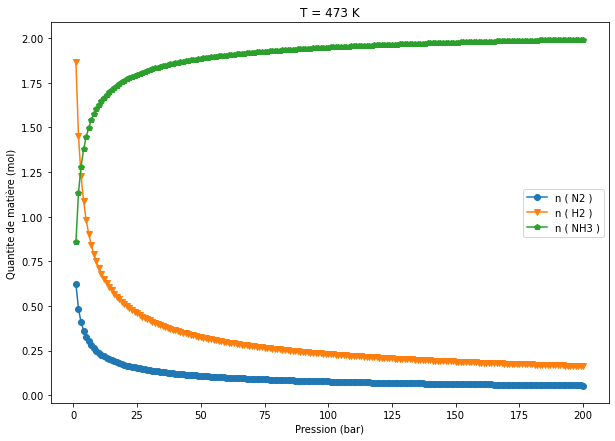

In [16]:
T = 473 # Choix de la temperature d'etude
n1i = 1
n2i = 3
n3i = 0.1
press = np.linspace(1,200,200) # liste des pressions entre 0,2 et 5 bar

## Determination des avancements a l'equilibre : resolution du systeme d'equations

def f(ksi,P):
    # chercher l'avancement a l'equilibre revient a chercher le zero de Q - K
    return Qr(ksi,n1i,n2i,n3i,P)-K(T)

# initialisation des listes de resultats (quantites de matiere des differentes especes)
nN2 = []
nH2 = []
nNH3=[]
# valeurs de depart de ksi utilisee pour le calcul numerique 
val_depart =0.2

for P in press:
    ksi = op.root(f,val_depart, args = P).x # resolution numerique

    # calcul et stockage des quantites de matiere
    nN2.append(n1i-ksi[0])
    nH2.append(n2i-3*ksi[0])
    nNH3.append(n3i+2*ksi[0])
    
    val_depart = ksi # le calcul numerique suivant partira des avancement calcules au point precedent
    
print()
print()
print("On souhaite étudier la réaction suivante : N2(g) + 3 H2(g) = 2 NH3(g)")
print()
print()
print("ΔrH° (T = 298 K) = ",round(-92.2,2),"kJ/mol < 0 : ","la réaction est exothermique")
print("ΔrS° (T = 298 K) = ",round(-0.189,2),"J/K.mol < 0")
print()
print()

# Trace du graphique (quantites de matiere en fonction de la pression totale)
plt.figure(figsize=(10,7))
plt.title('T = '+str(T)+' K')
plt.xlabel('Pression (bar)')
plt.ylabel('Quantite de matière (mol)')
plt.plot(press,nN2,marker = 'o',label='n ( N2 )')
plt.plot(press,nH2,marker = 'v',label='n ( H2 )')
plt.plot(press,nNH3,marker = 'p',label='n ( NH3 )')
plt.legend()
plt.savefig('pression.png') # Enregistrement du graphique dans un fichier image
plt.show()

# ***Tracé des quantités de matière a l'équilibre en fonction de la temperature pour P = 1 bar T entre 300 et 1000 K***



On souhaite étudier la réaction suivante : N2(g) + 3 H2(g) = 2 NH3(g)


ΔrH° (T = 298 K) =  -92.2 kJ/mol < 0 :  la réaction est exothermique


K° (T = 300 K) =  1518176.661
K° (T = 600 K) =  0.014




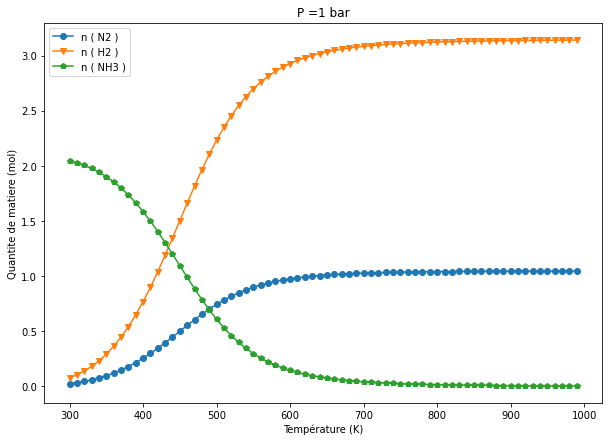

In [12]:
## Determination des avancements a l'equilibre : resolution du systeme d'equations

def f(ksi, T):
    # Prend en argument la liste [ksi1,ksi2] et renvoie la liste [Qr1-K1,Qr2-K2]
    # chercher l'avancement a l'equilibre revient a chercher le zero de Q - K
    return Qr(ksi,n1i,n2i,n3i,P)-K(T)

# Initialisation des valeurs

n1i = 1
n2i = 3
n3i = 0.1
P = 1 # Choix de la pression d'etude
temp = np.arange(300,1000,10) # liste des valeurs de temperature

# initialisation des listes de resultats (quantites de matiere des differentes especes)
nN2 = []
nH2 = []
nNH3=[]

# valeurs de depart de ksi utilisee pour le calcul numerique 
val_depart = 0.9

for T in temp:
    ksi = op.root(f,val_depart, args = T).x # resolution numerique

    # calcul et stockage des quantites de matiere
    nN2.append(n1i-ksi[0])
    nH2.append(n2i-3*ksi[0])
    nNH3.append(n3i+2*ksi[0])
    
    val_depart = ksi # le calcul numerique suivant partira des avancement calcules au point precedent
    
print()
print()
print("On souhaite étudier la réaction suivante : N2(g) + 3 H2(g) = 2 NH3(g)")
print()
print()
print("ΔrH° (T = 298 K) = ",round(-92.2,2),"kJ/mol < 0 : ","la réaction est exothermique")
print()
print()
print("K° (T = 300 K) = ",round(exp(-(-92.2+300*0.189)*1000/(8.314*300)),3))
print("K° (T = 600 K) = ",round(exp(-(-92.2+600*0.189)*1000/(8.314*600)),3))
print()
print()

# Trace du graphique (quantites de matiere en fonction de la pression totale)
plt.figure(figsize=(10,7))
plt.title('P ='+str(P)+' bar')
plt.xlabel('Température (K)')
plt.ylabel('Quantite de matiere (mol)')
plt.plot(temp,nN2,marker = 'o',label='n ( N2 )')
plt.plot(temp,nH2,marker = 'v',label='n ( H2 )')
plt.plot(temp,nNH3,marker = 'p',label='n ( NH3 )')
plt.legend()
plt.savefig('temp.png') # Enregistrement du graphique dans un fichier image
plt.show()

## ***Tracé des quantités de matière a l'équilibre en fonction de la quantité d'eau pour P = 1 bar, T = 473 K, nH2 initial compris entre 1 mol et 10 mol***



On souhaite étudier la réaction suivante : N2(g) + 3 H2(g) = 2 NH3(g)


ΔrH° (T = 298 K) =  -92.2 kJ/mol < 0 :  la réaction est exothermique
ΔrS° (T = 298 K) =  -0.189 J/K.mol < 0




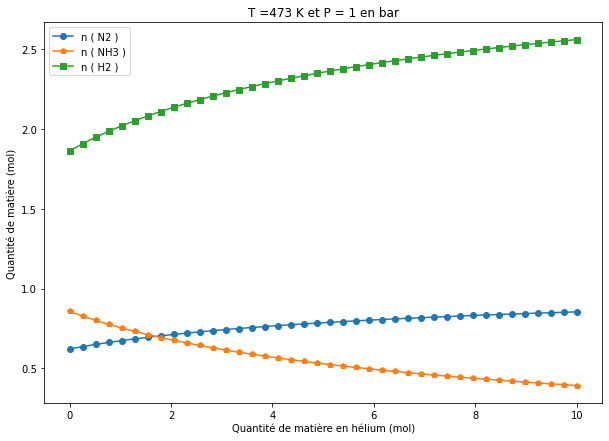

In [9]:
## Quotient reactionnel
# avancement ksi

def Qr(ksi,n1i,n2i,n3i,n4i,P):
    # Renvoie la valeur du quotient reactionnel de la reaction pour l'avancement ksi, pour une pression totale P (en bars)
    # et pour les quantites de matiere initiales : n1i mol de NH3, n2i mol de 02, n3i mol de NO, n4i mol de H20
    return (n3i+2*ksi)**2*(n1i+n2i+n4i+n3i-2*ksi)**2/((n2i-3*ksi)**3*(n1i-ksi)*P**2)

## Determination des avancements a l'equilibre : resolution du systeme d'equations

def f(ksi, n4i):
    # chercher l'avancement a l'equilibre revient a chercher le zero de Q - K
    return Qr(ksi,n1i,n2i,n3i,n4i,P)-K(T)


T = 473 # Choix de la temperature d'etude
P = 1 # Choix de la pression d'etude

nHe = np.linspace(0,10,40) # liste des valeurs de quantité de matiere initiale d'eau
n1i = 1
n2i = 3
n3i = 0.1

# initialisation des listes de resultats (quantites de matiere des differentes especes)
nN2 = []
nH2=[]
nNH3=[]

# valeurs de depart de ksi utilisee pour le calcul numerique 
val_depart = 0.33

for n4i in nHe:
    ksi = op.root(f,val_depart, args = n4i).x # resolution numerique

    # calcul et stockage des quantites de matiere
    nN2.append(n1i-ksi[0])
    nH2.append(n2i-3*ksi[0])
    nNH3.append(n3i+2*ksi[0])
    
    #val_depart = ksi # le calcul numerique suivant partira des avancement calcules au point precedent
    
print()
print()
print("On souhaite étudier la réaction suivante : N2(g) + 3 H2(g) = 2 NH3(g)")
print()
print()
print("ΔrH° (T = 298 K) = ",round(-92.2,2),"kJ/mol < 0 : ","la réaction est exothermique")
print("ΔrS° (T = 298 K) = ",round(-0.189,3),"J/K.mol < 0")
print()
print()

# Trace du graphique (quantites de matiere en fonction de la pression totale)
plt.figure(figsize=(10,7))
plt.title('T ='+str(T)+' K et P = '+str(P)+' en bar')
plt.xlabel('Quantité de matière en hélium (mol)')
plt.ylabel('Quantité de matière (mol)')
plt.plot(nHe,nN2,marker = 'o',label='n ( N2 )')
plt.plot(nHe,nNH3,marker = 'p',label='n ( NH3 )')
plt.plot(nHe,nH2,marker = 's',label='n ( H2 )')
plt.legend()
plt.savefig('dihydrogène.png') # Enregistrement du graphique dans un fichier image
plt.show()